Simple Linear Regression Results (Feature: Avg. Area Income):
Intercept: -225053.70
Coefficient (Avg. Area Income): 21.21
Mean Squared Error (MSE): 74194887058.66
Root Mean Squared Error (RMSE): 272387.38
R-squared: 0.40

Multiple Linear Regression Results:
Intercept: -2635072.90
Coefficients: {'Avg. Area Income': 21.65, 'Avg. Area House Age': 164666.48, 'Avg. Area Number of Rooms': 119624.01, 'Avg. Area Number of Bedrooms': 2440.38, 'Area Population': 15.27}
Mean Squared Error (MSE): 10089009300.89
Root Mean Squared Error (RMSE): 100444.06
R-squared: 0.92


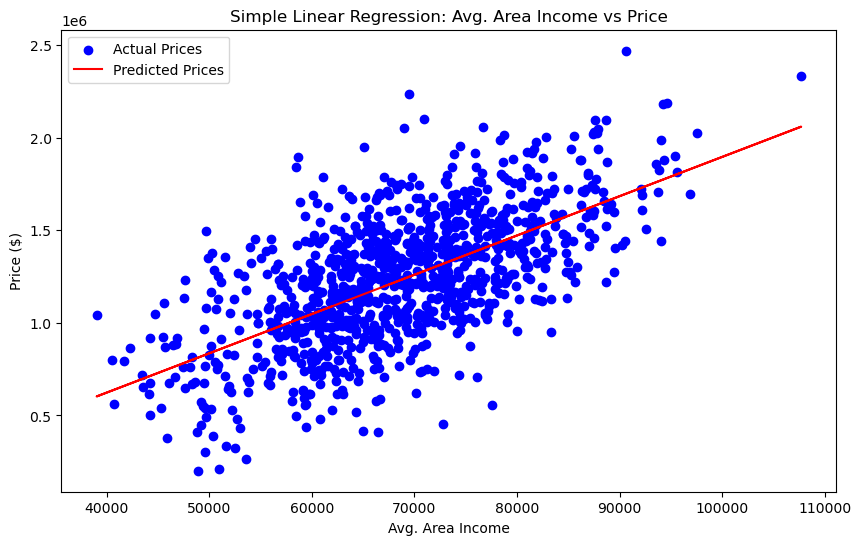

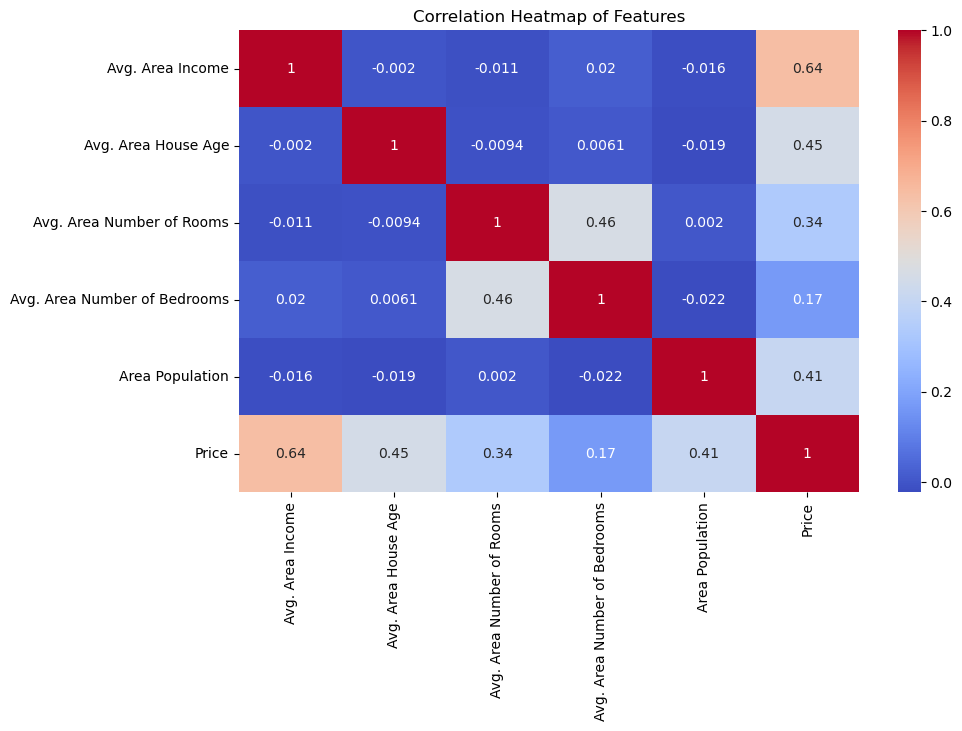

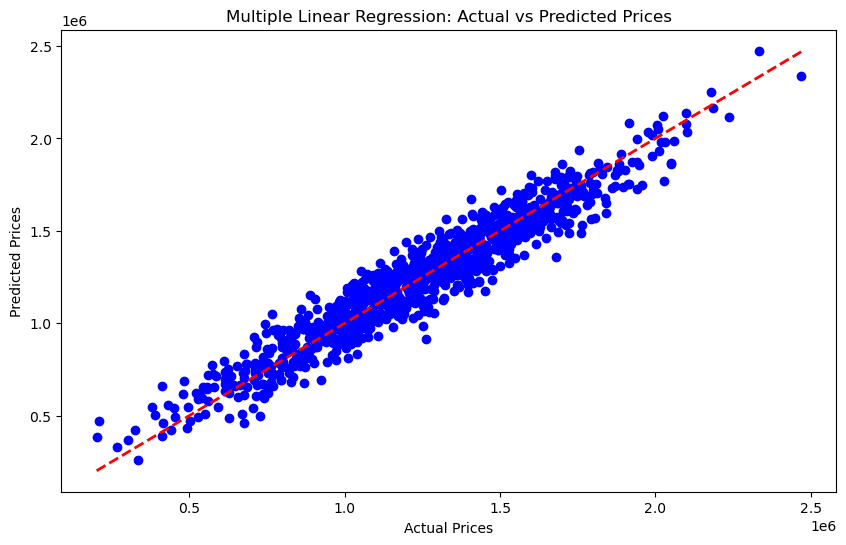


Example Prediction for a New House:
Features: Avg. Area Income=80000, House Age=6, Rooms=7, Bedrooms=4, Population=40000
Predicted Price: $1543044.58


C:\Users\Prithviraj Ghorpade\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/master/USA_Housing.csv"
df = pd.read_csv(url)

# Step 2: Data Preprocessing
# Drop the 'Address' column as it contains text data not suitable for linear regression
df = df.drop('Address', axis=1)

# Features (X) and target (y)
X = df.drop('Price', axis=1)  # All features for multiple linear regression
X_simple = df[['Avg. Area Income']]  # Single feature for simple linear regression
y = df['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_simple = X_train[['Avg. Area Income']]  # Extract single feature from X_train
X_test_simple = X_test[['Avg. Area Income']]    # Extract single feature from X_test

# Step 3: Simple Linear Regression
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

# Predictions
y_pred_simple = simple_lr.predict(X_test_simple)

# Evaluation Metrics
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Simple Linear Regression Results (Feature: Avg. Area Income):")
print(f"Intercept: {simple_lr.intercept_:.2f}")
print(f"Coefficient (Avg. Area Income): {simple_lr.coef_[0]:.2f}")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple:.2f}")
print(f"R-squared: {r2_simple:.2f}")

# Step 4: Multiple Linear Regression
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Predictions
y_pred_multiple = multiple_lr.predict(X_test)

# Evaluation Metrics
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression Results:")
print(f"Intercept: {multiple_lr.intercept_:.2f}")
print(f"Coefficients: {dict(zip(X.columns, multiple_lr.coef_.round(2)))}")
print(f"Mean Squared Error (MSE): {mse_multiple:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multiple:.2f}")
print(f"R-squared: {r2_multiple:.2f}")

# Step 5: Visualizations
# Simple Linear Regression Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual Prices')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicted Prices')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price ($)')
plt.title('Simple Linear Regression: Avg. Area Income vs Price')
plt.legend()
plt.savefig('simple_linear_regression_plot.png')
plt.show()

# Correlation Heatmap for Multiple Linear Regression
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.savefig('correlation_heatmap.png')
plt.show()

# Predicted vs Actual Prices for Multiple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Linear Regression: Actual vs Predicted Prices')
plt.savefig('multiple_linear_regression_plot.png')
plt.show()

# Step 6: Example Prediction
new_house = np.array([[80000, 6, 7, 4, 40000]])  # Example: [Avg. Area Income, House Age, Rooms, Bedrooms, Population]
predicted_price = multiple_lr.predict(new_house)
print("\nExample Prediction for a New House:")
print(f"Features: Avg. Area Income=80000, House Age=6, Rooms=7, Bedrooms=4, Population=40000")
print(f"Predicted Price: ${predicted_price[0]:.2f}")